# Support Vector Machine

In [27]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
iris = datasets.load_iris()

In [3]:
features = pd.DataFrame(iris.data,columns = iris.feature_names)
target = pd.DataFrame(iris.target,columns =['target'])
df = pd.concat([features, target], axis=1)

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [6]:
sepal_length = iris['data'][:, 0]
petal_length = iris['data'][:, 2]
sepal_width = iris['data'][:, 1]
petal_width = iris['data'][:, 3]

In [7]:
target = iris['target']

# Data preprocessing

In [8]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [9]:
z = np.abs(stats.zscore(df))
print(z)

[[9.00681170e-01 1.01900435e+00 1.34022653e+00 1.31544430e+00
  1.22474487e+00]
 [1.14301691e+00 1.31979479e-01 1.34022653e+00 1.31544430e+00
  1.22474487e+00]
 [1.38535265e+00 3.28414053e-01 1.39706395e+00 1.31544430e+00
  1.22474487e+00]
 [1.50652052e+00 9.82172869e-02 1.28338910e+00 1.31544430e+00
  1.22474487e+00]
 [1.02184904e+00 1.24920112e+00 1.34022653e+00 1.31544430e+00
  1.22474487e+00]
 [5.37177559e-01 1.93979142e+00 1.16971425e+00 1.05217993e+00
  1.22474487e+00]
 [1.50652052e+00 7.88807586e-01 1.34022653e+00 1.18381211e+00
  1.22474487e+00]
 [1.02184904e+00 7.88807586e-01 1.28338910e+00 1.31544430e+00
  1.22474487e+00]
 [1.74885626e+00 3.62176246e-01 1.34022653e+00 1.31544430e+00
  1.22474487e+00]
 [1.14301691e+00 9.82172869e-02 1.28338910e+00 1.44707648e+00
  1.22474487e+00]
 [5.37177559e-01 1.47939788e+00 1.28338910e+00 1.31544430e+00
  1.22474487e+00]
 [1.26418478e+00 7.88807586e-01 1.22655167e+00 1.31544430e+00
  1.22474487e+00]
 [1.26418478e+00 1.31979479e-01 1.340226

In [10]:
#Z score greater in the range -3 and 3 indicates an unsual amount of distance from the center, meaning an outlier.
# For example the the output array basically means z[25][2] has an outlier where 25 is the row and 2 is the column.
#Note that we have quite a few outliers in the 2nd feature.
threshold = 3
print(np.where(z > 3))

(array([15], dtype=int64), array([1], dtype=int64))


In [11]:
#Checking for outliers using interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
target               2.0
dtype: float64


In [12]:
#True indicates outliers, returns boolean
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                False             False              False             False   
1                False             False              False             False   
2                False             False              False             False   
3                False             False              False             False   
4                False             False              False             False   
..                 ...               ...                ...               ...   
145              False             False              False             False   
146              False             False              False             False   
147              False             False              False             False   
148              False             False              False             False   
149              False             False              False             False   

     target  
0     False  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


# Visualization

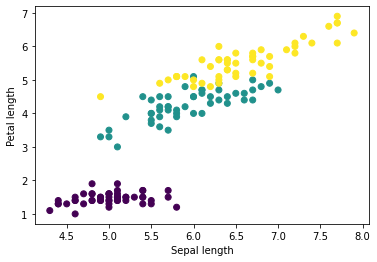

In [15]:
plt.scatter(sepal_length,petal_length, c = target)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()

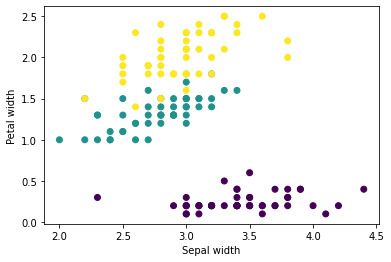

In [16]:
plt.scatter(sepal_width,petal_width, c = target)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.show()

# Classfication for Sepal and petal length

In [17]:
#converting them into a single array
X = np.column_stack((sepal_length, petal_length))
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [18]:
clf = svm.SVC(kernel = 'linear', C=1)

In [19]:
clf.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [20]:
clf.score(x_test,y_test)

0.9666666666666667

In [37]:
y_pred = clf.predict(x_test)

<AxesSubplot:>

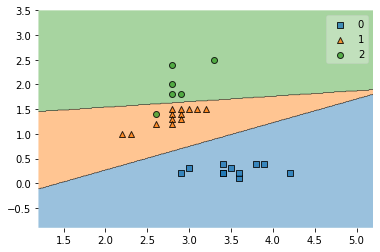

In [38]:
plot_decision_regions(X = x_test , y = y_test,clf = clf, legend = 1)

# Classification for sepal and petal width

In [39]:
#converting them into a single array
X1 = np.column_stack((sepal_width, petal_width))
y1 = iris.target

x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state = 0)

In [40]:
clf = svm.SVC(kernel = 'linear', C=1)

In [41]:
#Accuracy score, the score seems to be similar to both sepal and petal.
#Svm remains accurate for both of the measurements. 
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9666666666666667

In [42]:
y1_pred = clf.predict(x_test)

<AxesSubplot:>

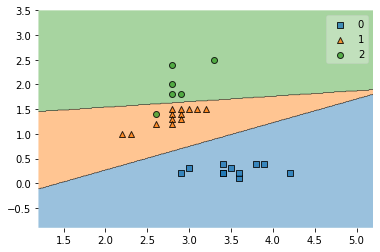

In [43]:
plot_decision_regions(X = x_test , y = y_test,clf = clf, legend = 1)

# Metrics used for SVM (Sepal & petal length)

In [46]:
#Accuracy scores have been mentioned above for length and breadth. 
#pos_label, average is required for multi class varibales 
#if we do not mention the average is set to binary by default.
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))

Precision: 0.9666666666666667


C:\Users\sourabh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [47]:
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))

Recall: 0.9666666666666667


C:\Users\sourabh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


# Metrics used for SVM (Sepal & petal width)

In [49]:
print("Precision:",metrics.precision_score(y_test, y1_pred,pos_label='positive',
                                           average='micro'))

Precision: 0.9666666666666667


C:\Users\sourabh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [50]:
print("Recall:",metrics.recall_score(y_test, y1_pred,pos_label='positive',
                                           average='micro'))

Recall: 0.9666666666666667


C:\Users\sourabh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


# Confusion matrix

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


C:\Users\sourabh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
<ipython-input-54-c843a71d08c6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([''] + labels)
<ipython-input-54-c843a71d08c6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([''] + labels)


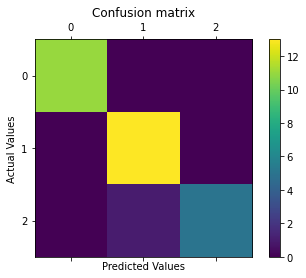

In [54]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
cax1 = ax1.matshow(cm)
plt.title('Confusion matrix')
fig1.colorbar(cax1)
ax1.set_xticklabels([''] + labels)
ax1.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()